In [1]:
from models.abstract_model import AbstractModel
import re
import string
import pandas as pd
import numpy as np

from nltk import FreqDist
from nltk.stem import WordNetLemmatizer

In [ ]:
### Preprocessing: accept string text, return a list of word stems
def _preprocess(text):
    text = re.sub('\s', ' ', text)
    text = text.lower()
    text = text.encode('ascii', 'ignore').decode()
    temp = [c for c in text if c not in string.punctuation]
    text_clean = ''.join(temp)
    
    li = text_clean.split(' ')
    lemm = WordNetLemmatizer()
    wdlist = [lemm.lemmatize(wd, pos="v") for wd in li]
    
    return wdlist

In [ ]:
### Take author and input text, return df (Series) of profiles
def _makeProfile(self, auth, text):
    wdlist = _preprocess(text)

    totalvocab = len(wdlist)

    fd = FreqDist(wdlist)
    commonwords = dict(fd.most_common(self.topN))
    df = pd.DataFrame.from_dict(commonwords, orient='index', columns=[auth])
    df = df/totalvocab #normalize
    df = df.transpose()
    
    return df

In [ ]:
### Convert text to features
def _makeFeatureMatrix(self, training_data):
    
    featdf = pd.DataFrame()
    
    for auth in training_data:
        text = training_data[auth]
        
        df = _makeProfile(self, auth, text)
        
        featdf = featdf.append(df) #, ignore_index=True)

    featdf.fillna(0, inplace=True)
        
    #print(featdf)
    return featdf

In [ ]:
## Measures the similarity between two profiles by the angle formed between them ##
def _cosSimilarity(p1, p2):
    return (p1 @ p2) / (np.linalg.norm(p1) * np.linalg.norm(p2))

In [ ]:
def train(self, training_data, topN=100):
    ##TODO: call _makeFeatureMatrix and convert to desired data structure of o/p profiles
    
    self.topN = topN
    
    traindict = {}
    for auth in training_data:
        corpus = ''
        for text in training_data[auth]:
            corpus = corpus+text+' '
        traindict[auth] = corpus
    
    featmatrix = _makeFeatureMatrix(self, traindict)
    
    self.profiledf = featmatrix

In [ ]:
def identify(self, text):
    
    testdf = _createTest(self, text)
    authors = self.profiledf.index.tolist()
    
    M = len(self.profiledf)
    clist = []
    for i in range(M):
        clist.append(cosSimilarity(self.profiledf.iloc[i], testdf.iloc[0]))
    
    probdict = {}
    for i in range(M):
        probdict[authors[i]] = clist[i]/sum(clist)
        
    idlist = sorted([(clist[i]/sum(clist), authors[i]) for i in range(M)], reverse=True)
        
    return idlist
    

In [ ]:
def _createTest(self, text):
    
    featmatrix = self.profiledf
    
    pr = _makeProfile(self, 'Test', text)
    
    testdf = featmatrix.append(pr)
    testdf.fillna(0, inplace=True)

    col_list = featmatrix.columns.tolist()
    testdf = testdf.iloc[-1]
    
    return testdf[col_list]

### Testing class

In [2]:
from models.word_frequency_model import BOW


In [66]:
### Read training data - V BRUTE FORCE

path = r'C:\Users\shala\classify3\ling-227-final-project\texts'
traindict = {'Alexander Pope':[r'\Pope\Pope_train1.txt'],
            'John Dryden': [r'\Dryden\Dryden_train1.txt'],
            'George Chapman':[r'\Chapman\Chapman_train1.txt',
                             r'\Chapman\Chapman_train2.txt', r'\Chapman\Chapman_train4.txt']}

training_data = {'Alexander Pope':[], 'John Dryden':[], 'George Chapman':[]}

for auth in traindict:
    flist = traindict[auth]
    #clist = []
    content = ''
    for fi in flist:
        txtfile = path+fi
        with open(txtfile, 'r', encoding='utf-8') as f:
            ogtext = f.read()
            training_data[auth].append(ogtext)
            #clist.append(ogtext)
            #content = content+ogtext+' '
    #filedict[auth] = content

In [20]:
model = BOW(10)

model.train(training_data) 
model.profiledf

,the,and,to,a,of,in,be,or,with,all,,his,their,her,that
Alexander Pope,0.054000,0.039688,0.022380,0.017910,0.016631,0.016555,0.016269,0.01055,0.009361,0.008654,0.000000,0.000000,0.000000,0.000000,0.000000
John Dryden,0.040572,0.027334,0.020733,0.011541,0.015197,0.011163,0.017558,0.00000,0.000000,0.000000,0.201105,0.012997,0.008894,0.000000,0.000000
George Chapman,0.037768,0.039588,0.023457,0.000000,0.021001,0.020451,0.018206,0.00000,0.013718,0.000000,0.000000,0.018291,0.000000,0.019815,0.014608


In [ ]:
len(model.profiledf)

In [61]:
testdict = {'Alexander Pope':[r'\Pope\Pope_iliad.txt'], 
            'John Dryden':[r'\Dryden\Dryden_iliad_1_p6.txt'],
            'George Chapman':[r'\Chapman\Chapman_iliad.txt']
           }


for auth in testdict:
    flist = testdict[auth]
    #clist = []
    content = ''
    for fi in flist:
        txtfile = path+fi
        with open(txtfile, 'r', encoding='utf-8') as f:
            content = f.read()
    testdict[auth] = content

In [ ]:
pr = model.profiledf
pr.iloc[1]
testser = model._createTest(text)

In [ ]:
p1 = pr.iloc[0]
p2 = testser
model._cosSimilarity(p1, p2)

In [58]:
devdict = {'Alexander Pope':[r'\Pope\Pope_train2.txt'],
            'John Dryden': [r'\Dryden\Dryden_train2.txt'],
            'George Chapman':[r'\Chapman\Chapman_train1.txt']}

for auth in devdict:
    flist = devdict[auth]
    #clist = []
    content = ''
    for fi in flist:
        txtfile = path+fi
        with open(txtfile, 'r', encoding='utf-8') as f:
            content = f.read()
    devdict[auth] = content

In [21]:
text = devdict['Alexander Pope']
model.identify(text)

[(0.49219557536296654, 'Alexander Pope'),
 (0.40351885247788905, 'George Chapman'),
 (0.10428557215914443, 'John Dryden')]

In [84]:
xrange = range(10, 1000, 100)
yyval = {'Alexander Pope':[],
            'John Dryden': [],
            'George Chapman':[]}

yval = []
auth = 'Alexander Pope'
text = devdict[auth]

for topN in xrange:
    model = BOW(topN)
    model.train(training_data) 
    id = model.identify(text)
    for (p, a) in id:
        yyval[a].append(p)

In [69]:
import matplotlib.pylab as plt
import pandas as pd

In [ ]:
col = {'Alexander Pope':'r',
            'John Dryden': 'b',
            'George Chapman':'g'}

for auth in yyval:
    plt.plot(xrange, yyval[auth], col[auth])


plt.show()

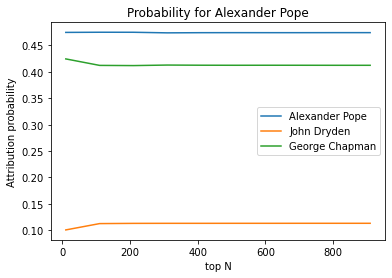

In [85]:
ydf = pd.DataFrame(yyval, index=xrange)
ax = ydf.plot(title='Probability for %s' %auth)
ax.set_xlabel('top N')
ax.set_ylabel('Attribution probability')
plt.show()

In [ ]:
##observation: Chapman train1 is critical to training (improves probabilities)
##Next steps: tf-idf embedding, word2vec